# Fisher Matrix Validation: Monte Carlo Analysis

This notebook validates the Fisher matrix approximation by comparing Monte Carlo parameter estimates with the theoretical Gaussian distribution predicted by the Fisher matrix.

**Theoretical expectation:** The Maximum Likelihood Estimators (MLEs) from noise realizations should follow a multivariate Gaussian distribution:

$$\hat{\theta} \sim \mathcal{N}(\theta_{\text{true}}, \Gamma^{-1})$$

where $\Gamma^{-1}$ is the inverse Fisher matrix (parameter covariance matrix).

In [1]:
!ls ../../..

CV_estimates  noise_understanding  PE_simulations  utility_funcs


In [2]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
import corner
from scipy import stats
import sys
import os

# Add path to utility functions
sys.path.append("../../..")
from utility_funcs.hdf5_file_management import load_fisher_results_from_hdf5

# Set plotting parameters
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# File configuration
base_dir = "/work/scratch/data/burkeol/Gaps_EMRIs/Fisher_Matrices"
print("Available Fisher Matrix simulations are", os.listdir(base_dir))

Available Fisher Matrix simulations are ['Fisher_Matrix_Case_1_w_mask_full_shamalama.h5', 'Fisher_Matrix_Case_1_w_mask_PAAM.h5', 'Fisher_Matrix_Case_1_w_window_full_shamalama_with_spice_planned_unplanned_10min_PAAM_10_sec.h5', 'Fisher_Matrix_Case_1_w_mask_big_gaps.h5', 'Fisher_Matrix_Case_1_w_window_full_shamalama_with_spice_planned_unplanned_10min_PAAM_1_min.h5', 'Fisher_Matrix_Case_1_w_mask_full_shamalama_with_spice.h5', 'Fisher_Matrix_Case_1_no_window.h5', 'Fisher_Matrix_Case_1_w_mask_antenna.h5', 'Fisher_Matrix_Case_1_w_mask_PAAM_and_antenna.h5']


## 1. Load Fisher Matrix and Monte Carlo Results

In [26]:

filename = 'Fisher_Matrix_Case_1_no_window.h5'  # Adjust filename as needed
file_path = Path(base_dir) / filename

# Load data
print(f"Loading data from: {file_path}")
data_no_mask = load_fisher_results_from_hdf5(str(file_path))
# Extract key components
param_names = data_no_mask['parameter_names']
fisher_covariance_no_mask = data_no_mask['inverse_fisher_matrix']  # Inverse Fisher matrix
emri_params = data_no_mask['emri_parameters']

# Extract Monte Carlo results
mc_data_no_mask = data_no_mask['monte_carlo_analysis']
mle_realizations_no_mask = mc_data_no_mask['noise_MLE_realizations']  # Shape: (n_realizations, n_params)
empirical_covariance_no_mask = mc_data_no_mask['empirical_covariance_matrix']
n_realizations_no_mask = mc_data_no_mask['n_realizations']

print(f"\nLoaded {n_realizations_no_mask} Monte Carlo realizations")
print(f"Parameters: {param_names}")
print(f"MLE realizations shape: {mle_realizations_no_mask.shape}")
print(f"Fisher covariance shape: {fisher_covariance_no_mask.shape}")

Loading data from: /work/scratch/data/burkeol/Gaps_EMRIs/Fisher_Matrices/Fisher_Matrix_Case_1_no_window.h5
Loaded Fisher matrix data as NumPy arrays
Parameters: 12
Fisher matrix shape: (12, 12)
Additional data loaded: EMRI parameters (14 params), observation parameters, gap analysis (window function ((12623259,))), Monte Carlo analysis (50000 realizations)

Loaded 50000 Monte Carlo realizations
Parameters: ['m1', 'm2', 'a', 'p0', 'e0', 'dist', 'qS', 'phiS', 'qK', 'phiK', 'Phi_phi0', 'Phi_r0']
MLE realizations shape: (50000, 12)
Fisher covariance shape: (12, 12)


In [27]:
filename_1min = 'Fisher_Matrix_Case_1_w_window_full_shamalama_with_spice_planned_unplanned_10min_PAAM_1_min.h5'  # Adjust filename as needed
file_path_1min = Path(base_dir) / filename_1min

filename_10sec = 'Fisher_Matrix_Case_1_w_window_full_shamalama_with_spice_planned_unplanned_10min_PAAM_10_sec.h5'  # Adjust filename as needed
file_path_10sec = Path(base_dir) / filename

data_1min = load_fisher_results_from_hdf5(str(file_path_1min))
data_10sec = load_fisher_results_from_hdf5(str(file_path_10sec))



Loaded Fisher matrix data as NumPy arrays
Parameters: 12
Fisher matrix shape: (12, 12)
Additional data loaded: EMRI parameters (14 params), observation parameters, gap analysis (window function ((12623259,)))
Loaded Fisher matrix data as NumPy arrays
Parameters: 12
Fisher matrix shape: (12, 12)
Additional data loaded: EMRI parameters (14 params), observation parameters, gap analysis (window function ((12623259,))), Monte Carlo analysis (50000 realizations)


In [28]:
check_diff = data_10sec['gap_analysis']['window_function'] - data_1min['gap_analysis']['window_function']
print(np.sum(check_diff))

1854370.0


In [10]:

filename = 'Fisher_Matrix_Case_1_w_window_full_shamalama_with_spice_planned_unplanned_10min_PAAM_1_min.h5'  # Adjust filename as needed
file_path = Path(base_dir) / filename

# Load data
print(f"Loading data from: {file_path}")
data = load_fisher_results_from_hdf5(str(file_path))
# Extract key components
param_names = data['parameter_names']
fisher_covariance = data['inverse_fisher_matrix']  # Inverse Fisher matrix
emri_params = data['emri_parameters']

# Extract Monte Carlo results
mc_data = data['monte_carlo_analysis']
mle_realizations = mc_data['noise_MLE_realizations']  # Shape: (n_realizations, n_params)
empirical_covariance = mc_data['empirical_covariance_matrix']
n_realizations = mc_data['n_realizations']

print(f"\nLoaded {n_realizations} Monte Carlo realizations")
print(f"Parameters: {param_names}")
print(f"MLE realizations shape: {mle_realizations.shape}")
print(f"Fisher covariance shape: {fisher_covariance.shape}")

Loading data from: /work/scratch/data/burkeol/Gaps_EMRIs/Fisher_Matrices/Fisher_Matrix_Case_1_w_window_full_shamalama_with_spice_planned_unplanned_10min_PAAM_1_min.h5
Loaded Fisher matrix data as NumPy arrays
Parameters: 12
Fisher matrix shape: (12, 12)
Additional data loaded: EMRI parameters (14 params), observation parameters, gap analysis (window function ((12623259,))), Monte Carlo analysis (50000 realizations)

Loaded 50000 Monte Carlo realizations
Parameters: ['m1', 'm2', 'a', 'p0', 'e0', 'dist', 'qS', 'phiS', 'qK', 'phiK', 'Phi_phi0', 'Phi_r0']
MLE realizations shape: (50000, 12)
Fisher covariance shape: (12, 12)


In [11]:
uncertainty_params_no_mask = np.diag(fisher_covariance_no_mask)**(1/2)
uncertainty_params_mask = np.diag(fisher_covariance)**(1/2)

ratio = uncertainty_params_no_mask/uncertainty_params_mask
ratio_mean = np.mean(ratio)
for i, param in enumerate(param_names):
    print(f"Ratio in parameter {param_names[i]} is = {ratio[i]}")

print(f"mean of precision loss is = {ratio_mean}")

loss_of_info  = np.sum(data['gap_analysis']['window_function'])/len(data['gap_analysis']['window_function'])

print(f"square root of Information lost due to gaps = {loss_of_info}")

Ratio in parameter m1 is = 0.9489006035074976
Ratio in parameter m2 is = 0.9456693739192225
Ratio in parameter a is = 0.970345423022689
Ratio in parameter p0 is = 0.9342228047834894
Ratio in parameter e0 is = 0.9314883099914252
Ratio in parameter dist is = 0.909207573244812
Ratio in parameter qS is = 0.9289618410057618
Ratio in parameter phiS is = 0.919532577390787
Ratio in parameter qK is = 0.9077345950062937
Ratio in parameter phiK is = 0.9087284604871776
Ratio in parameter Phi_phi0 is = 0.9099633920553112
Ratio in parameter Phi_r0 is = 0.8968137561852639
mean of precision loss is = 0.9259640592166442
square root of Information lost due to gaps = 0.834339766545355


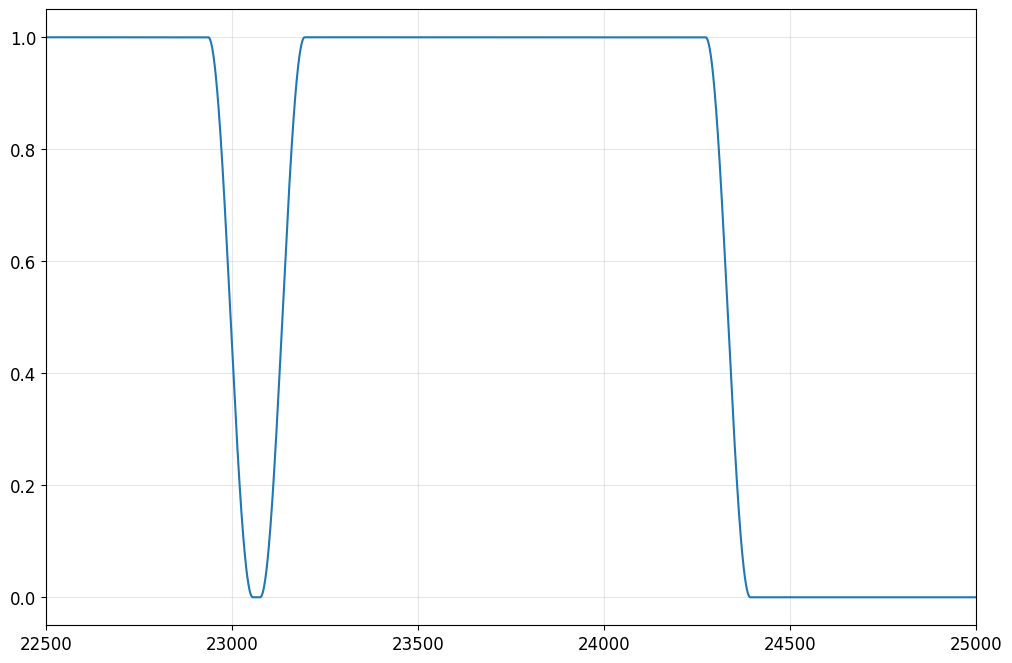

In [23]:
plt.plot(data_1min['gap_analysis']['window_function']);plt.xlim([22500,25000]);plt.show()

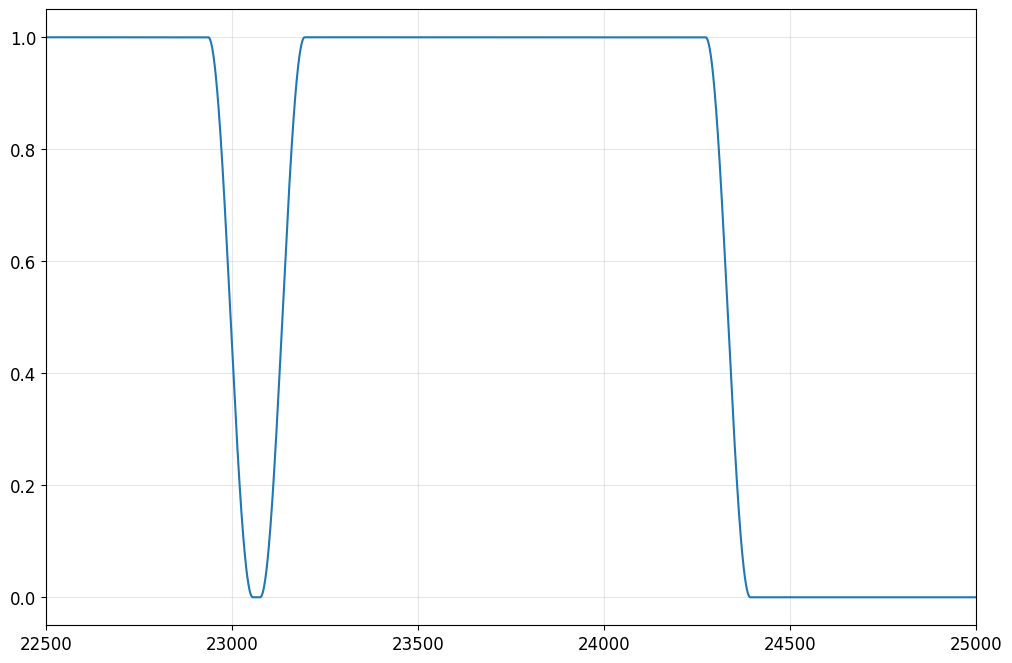

In [48]:
plt.plot(data['gap_analysis']['window_function']);plt.xlim([22500,25000]);plt.show()

## 2. Extract True Parameter Values and Center the Data

In [47]:
# Extract true parameter values in the same order as param_names
true_params = np.array([emri_params[name] for name in param_names])

# Center the MLE realizations around the true values
centered_mles = mle_realizations - true_params[None, :]

# Calculate statistics
empirical_means = np.mean(centered_mles, axis=0)
fisher_uncertainties = np.sqrt(np.diag(fisher_covariance))
empirical_uncertainties = np.sqrt(np.diag(empirical_covariance))

print("\nParameter comparison (Fisher vs Empirical uncertainties):")
print(f"{'Parameter':<12} {'True Value':<15} {'Fisher σ':<12} {'MC σ':<12} {'Ratio':<8}")
print("-" * 65)
for i, name in enumerate(param_names):
    ratio = empirical_uncertainties[i] / fisher_uncertainties[i] 
    print(f"{name:<12} {true_params[i]:<15.6e} {fisher_uncertainties[i]:<12.6e} "
          f"{empirical_uncertainties[i]:<12.6e} {ratio:<8.3f}")


Parameter comparison (Fisher vs Empirical uncertainties):
Parameter    True Value      Fisher σ     MC σ         Ratio   
-----------------------------------------------------------------
m1           1.000000e+06    1.359463e+00 4.174070e+00 3.070   
m2           1.000000e+01    1.814757e-05 6.982137e-05 3.847   
a            9.980000e-01    4.801425e-07 1.861756e-06 3.878   
p0           7.737500e+00    4.104290e-06 8.674929e-06 2.114   
e0           7.300000e-01    2.346513e-07 7.283533e-07 3.104   
dist         2.203608e+00    9.201879e-02 1.210121e-01 1.315   
qS           8.000000e-01    3.220337e-03 1.289153e-02 4.003   
phiS         2.200000e+00    3.425206e-03 1.956959e-02 5.713   
qK           1.600000e+00    2.558808e-02 3.509734e-02 1.372   
phiK         1.200000e+00    2.487213e-02 3.841238e-02 1.544   
Phi_phi0     2.000000e+00    7.481460e-02 1.336595e-01 1.787   
Phi_r0       3.000000e+00    1.755726e-02 2.350713e-02 1.339   


## 3. Individual Parameter Histogram Validation

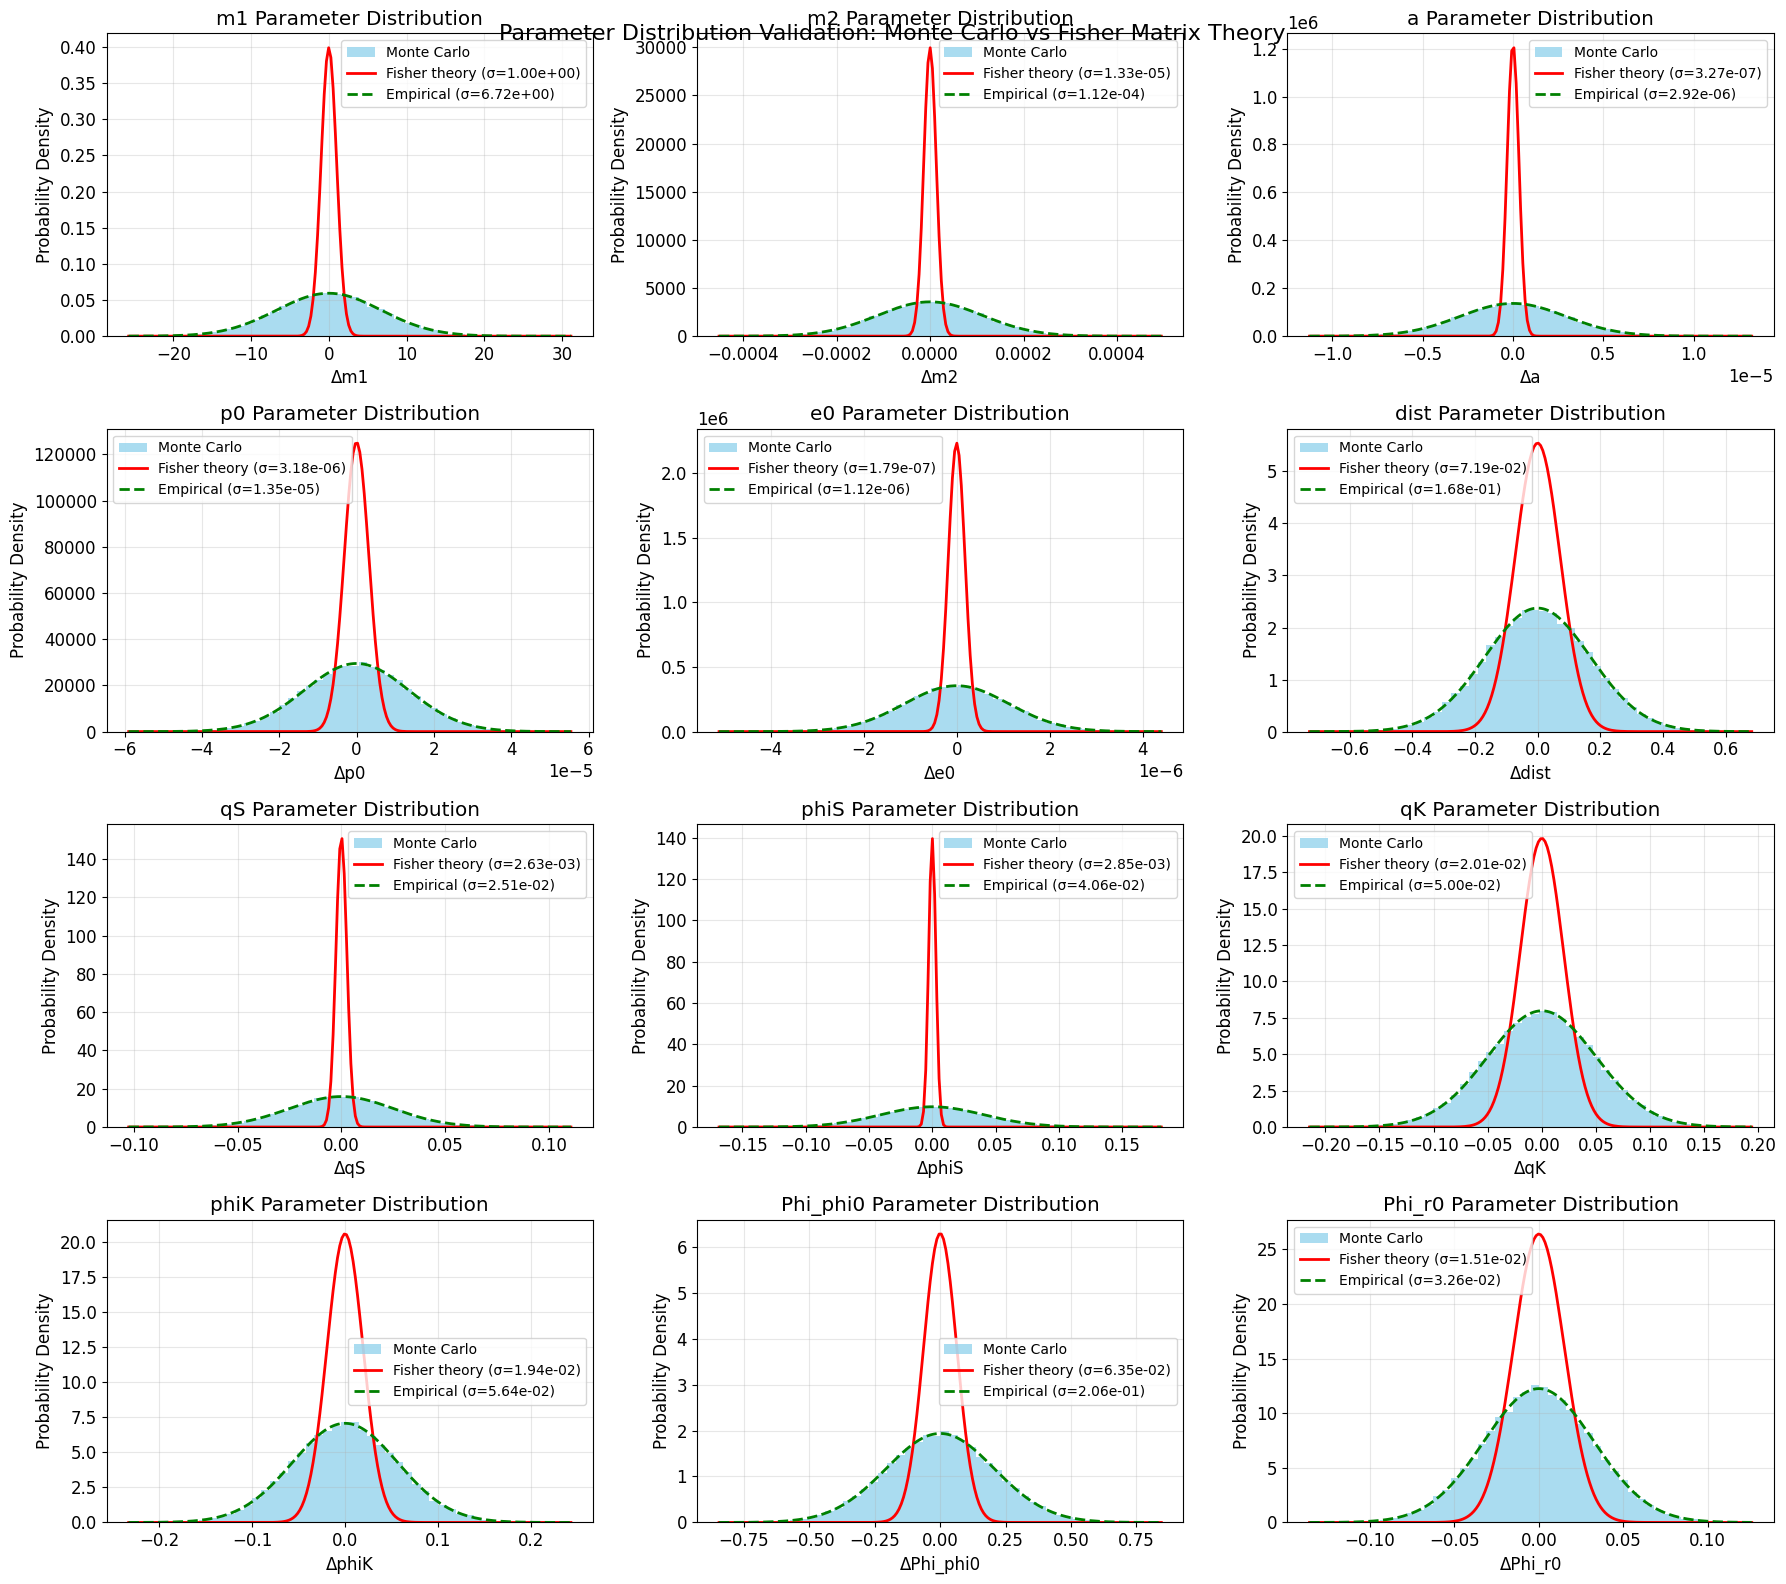

In [24]:
# Create subplots for all parameters
n_params = len(param_names)
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for i, (name, ax) in enumerate(zip(param_names, axes)):
    # Extract parameter data
    param_data = centered_mles[:, i]
    fisher_sigma = fisher_uncertainties[i]
    empirical_sigma = empirical_uncertainties[i]
    
    # Create histogram
    counts, bins, _ = ax.hist(param_data, bins=50, density=True, alpha=0.7, 
                             color='skyblue', label='Monte Carlo')
    
    # Overlay theoretical Gaussian from Fisher matrix
    x_range = np.linspace(param_data.min(), param_data.max(), 200)
    fisher_gaussian = stats.norm.pdf(x_range, 0, fisher_sigma)
    ax.plot(x_range, fisher_gaussian, 'r-', linewidth=2, 
            label=f'Fisher theory (σ={fisher_sigma:.2e})')
    
    # Overlay empirical Gaussian
    empirical_gaussian = stats.norm.pdf(x_range, 0, empirical_sigma)
    ax.plot(x_range, empirical_gaussian, 'g--', linewidth=2, 
            label=f'Empirical (σ={empirical_sigma:.2e})')
    
    # Formatting
    ax.set_xlabel(f'Δ{name}')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'{name} Parameter Distribution')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Parameter Distribution Validation: Monte Carlo vs Fisher Matrix Theory', 
             fontsize=16, y=0.98)
plt.show()

## 4. Covariance Matrix Comparison

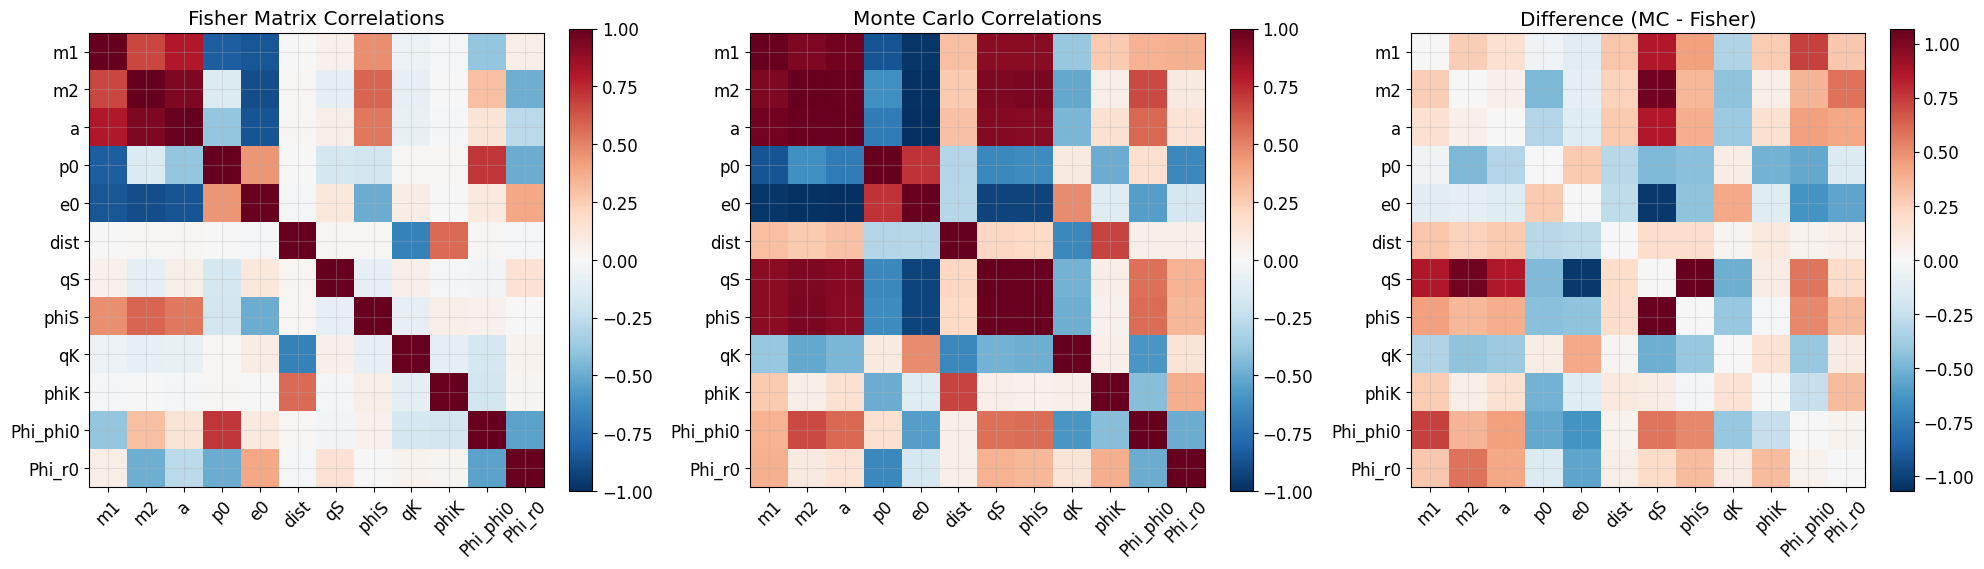


Maximum correlation difference: 1.0697
RMS correlation difference: 0.4061


In [25]:
# Calculate correlation matrices
fisher_corr = fisher_covariance / np.sqrt(np.outer(np.diag(fisher_covariance), 
                                                   np.diag(fisher_covariance)))
empirical_corr = empirical_covariance / np.sqrt(np.outer(np.diag(empirical_covariance), 
                                                        np.diag(empirical_covariance)))

# Create comparison plots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Fisher correlation matrix
im1 = axes[0].imshow(fisher_corr, cmap='RdBu_r', vmin=-1, vmax=1)
axes[0].set_title('Fisher Matrix Correlations')
axes[0].set_xticks(range(n_params))
axes[0].set_yticks(range(n_params))
axes[0].set_xticklabels(param_names, rotation=45)
axes[0].set_yticklabels(param_names)
plt.colorbar(im1, ax=axes[0], fraction=0.046)

# Empirical correlation matrix
im2 = axes[1].imshow(empirical_corr, cmap='RdBu_r', vmin=-1, vmax=1)
axes[1].set_title('Monte Carlo Correlations')
axes[1].set_xticks(range(n_params))
axes[1].set_yticks(range(n_params))
axes[1].set_xticklabels(param_names, rotation=45)
axes[1].set_yticklabels(param_names)
plt.colorbar(im2, ax=axes[1], fraction=0.046)

# Difference
diff = empirical_corr - fisher_corr
max_diff = np.max(np.abs(diff))
im3 = axes[2].imshow(diff, cmap='RdBu_r', vmin=-max_diff, vmax=max_diff)
axes[2].set_title('Difference (MC - Fisher)')
axes[2].set_xticks(range(n_params))
axes[2].set_yticks(range(n_params))
axes[2].set_xticklabels(param_names, rotation=45)
axes[2].set_yticklabels(param_names)
plt.colorbar(im3, ax=axes[2], fraction=0.046)

plt.tight_layout()
plt.show()

print(f"\nMaximum correlation difference: {max_diff:.4f}")
print(f"RMS correlation difference: {np.sqrt(np.mean(diff**2)):.4f}")

## 5. Corner Plot Comparison

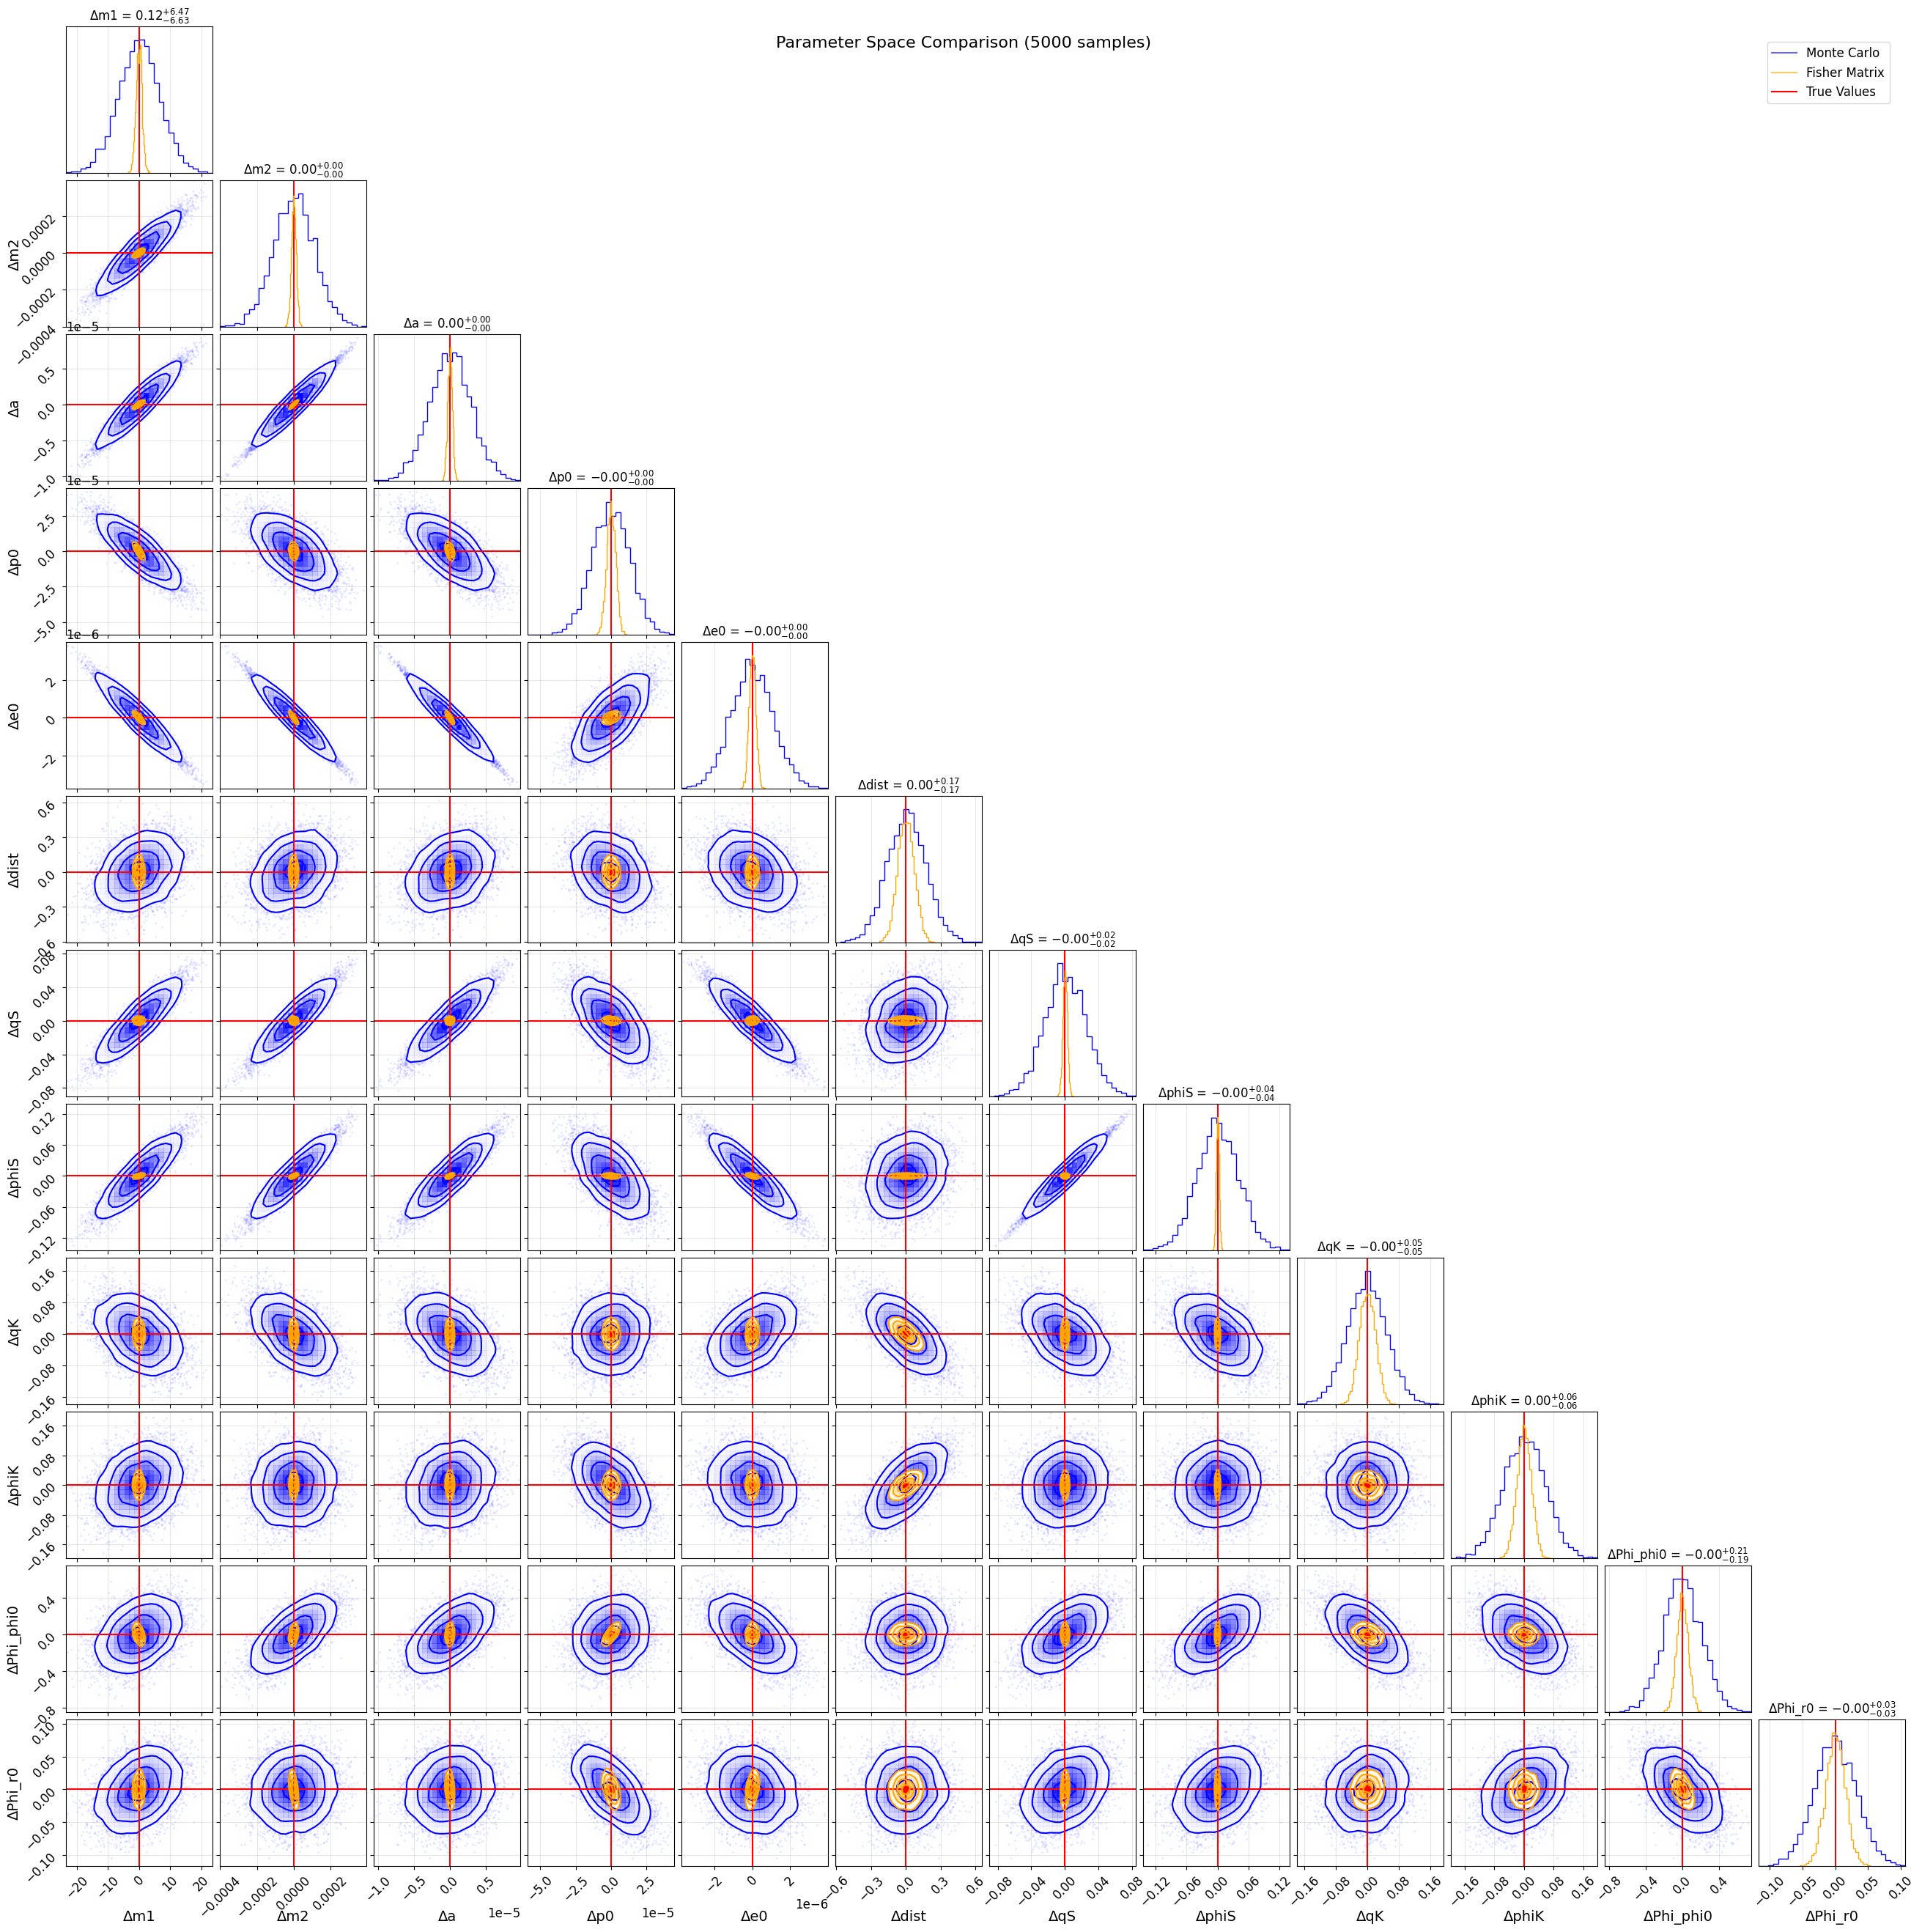

In [26]:
# Create corner plot comparing Monte Carlo samples with Fisher matrix prediction
# Note: corner plots work better with a subset of data for visualization
n_plot_samples = min(5000, n_realizations)  # Use subset for cleaner plotting
plot_indices = np.random.choice(n_realizations, n_plot_samples, replace=False)

# Monte Carlo corner plot
fig = corner.corner(centered_mles[plot_indices], 
                   labels=[f'Δ{name}' for name in param_names],
                   truths=np.zeros(n_params),  # True values are zero (centered data)
                   truth_color='red',
                   color='blue',
                   alpha=0.6,
                   bins=30,
                   smooth=1.0,
                   show_titles=True,
                   title_kwargs={"fontsize": 12},
                   label_kwargs={"fontsize": 14})

# Overlay Fisher matrix prediction
# Generate samples from Fisher matrix covariance
fisher_samples = np.random.multivariate_normal(np.zeros(n_params), 
                                               fisher_covariance, 
                                               size=n_plot_samples)

# Overlay on existing corner plot
corner.corner(fisher_samples, 
             fig=fig,
             color='orange',
             alpha=0.3,
             bins=30,
             smooth=1.0)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='blue', alpha=0.6, label='Monte Carlo'),
                  Line2D([0], [0], color='orange', alpha=0.6, label='Fisher Matrix'),
                  Line2D([0], [0], color='red', label='True Values')]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.suptitle(f'Parameter Space Comparison ({n_plot_samples} samples)', 
             fontsize=16, y=0.98)
plt.show()

## 6. Quantitative Assessment Summary

In [26]:
# Calculate overall agreement metrics
uncertainty_ratios = fisher_uncertainties / empirical_uncertainties
mean_ratio = np.mean(uncertainty_ratios)
std_ratio = np.std(uncertainty_ratios)

# Covariance matrix agreement
cov_relative_error = np.abs(fisher_covariance - empirical_covariance) / np.abs(empirical_covariance)
mean_cov_error = np.mean(cov_relative_error)

print("\n" + "="*60)
print("FISHER MATRIX VALIDATION SUMMARY")
print("="*60)

print(f"\nNumber of Monte Carlo realizations: {n_realizations:,}")
print(f"Number of parameters: {n_params}")

print(f"\nUNCERTAINTY COMPARISON:")
print(f"  Mean Fisher/MC uncertainty ratio: {mean_ratio:.3f} ± {std_ratio:.3f}")
print(f"  Ratio range: {uncertainty_ratios.min():.3f} - {uncertainty_ratios.max():.3f}")

print(f"\nCOVARIANCE MATRIX AGREEMENT:")
print(f"  Mean relative error: {mean_cov_error:.3f}")
print(f"  Max correlation difference: {max_diff:.4f}")
print(f"  RMS correlation difference: {np.sqrt(np.mean(diff**2)):.4f}")

print(f"\nVALIDATION STATUS:")
if 0.9 <= mean_ratio <= 1.1 and max_diff < 0.1:
    print("  ✓ PASSED: Fisher matrix provides accurate uncertainty estimates")
elif 0.8 <= mean_ratio <= 1.2 and max_diff < 0.2:
    print("  ~ MARGINAL: Fisher matrix provides reasonable uncertainty estimates")
else:
    print("  ✗ FAILED: Significant discrepancy between Fisher and Monte Carlo")

print(f"\nParameters with largest discrepancies:")
sorted_indices = np.argsort(np.abs(uncertainty_ratios - 1))[::-1]
for i in sorted_indices[:3]:
    print(f"  {param_names[i]}: ratio = {uncertainty_ratios[i]:.3f}")

print("\n" + "="*60)


FISHER MATRIX VALIDATION SUMMARY

Number of Monte Carlo realizations: 10,000
Number of parameters: 12

UNCERTAINTY COMPARISON:
  Mean Fisher/MC uncertainty ratio: 1.002 ± 0.006
  Ratio range: 0.991 - 1.012

COVARIANCE MATRIX AGREEMENT:
  Mean relative error: 0.235
  Max correlation difference: 0.0225
  RMS correlation difference: 0.0089

VALIDATION STATUS:
  ✓ PASSED: Fisher matrix provides accurate uncertainty estimates

Parameters with largest discrepancies:
  dist: ratio = 1.012
  phiK: ratio = 1.009
  p0: ratio = 0.991

